In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [13]:
data  = pd.read_csv("./datasets/credit_card_approval.csv")

<Axes: xlabel='label'>

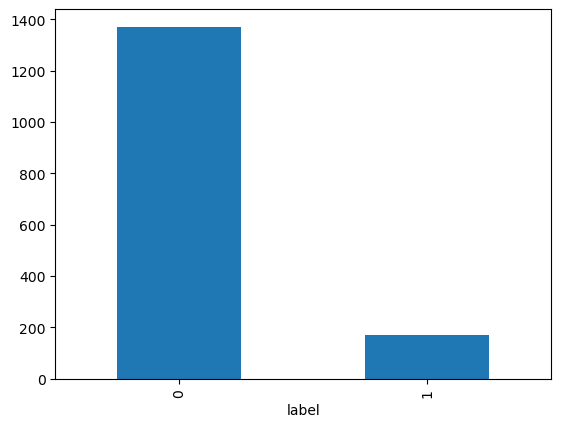

In [14]:
data["label"].value_counts().plot.bar()

In [15]:
data = data[data["Employed_days"] < 365243.000000]

In [16]:
data.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income     19
EDUCATION          0
Marital_status     0
Housing_type       0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Family_Members     0
label              0
dtype: int64

<Axes: ylabel='Frequency'>

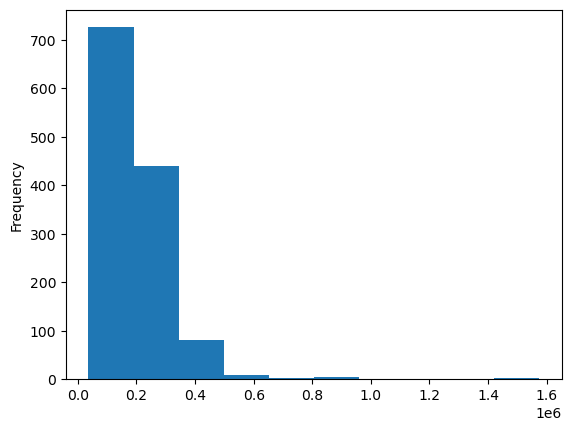

In [17]:
data['Annual_income'].plot.hist()

In [18]:
imputer = IterativeImputer()
data[["Annual_income", "Employed_days"]] = imputer.fit_transform(data[["Annual_income", "Employed_days"]])

In [19]:
data["GENDER"].value_counts()

GENDER
F    759
M    522
Name: count, dtype: int64

In [20]:
label_encoder = LabelEncoder()
data["GENDER"] = label_encoder.fit_transform(data["GENDER"])

In [21]:
def encode_boolean(bool_value):
    if bool_value == "Y":
        return 1
    else:
        return 0

In [22]:
print(data)

       Ind_ID  GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
1     5009744       0         Y             N         0  315000.000000   
2     5009746       0         Y             N         0  315000.000000   
3     5009749       0         Y             N         0  198872.679668   
4     5009752       0         Y             N         0  315000.000000   
5     5009754       0         Y             N         0  315000.000000   
...       ...     ...       ...           ...       ...            ...   
1536  5028645       0         N             Y         0  198870.720702   
1537  5023655       0         N             N         0  225000.000000   
1538  5115992       1         Y             Y         2  180000.000000   
1539  5118219       1         Y             N         0  270000.000000   
1540  5053790       0         Y             Y         0  225000.000000   

                          EDUCATION        Marital_status       Housing_type  \
1                  Higher educa

In [23]:
data["Car_Owner"] = data["Car_Owner"].apply(encode_boolean)

In [24]:
data["Propert_Owner"] = data["Propert_Owner"].apply(encode_boolean)

In [25]:
data["EDUCATION"].value_counts()

EDUCATION
Secondary / secondary special    822
Higher education                 378
Incomplete higher                 65
Lower secondary                   14
Academic degree                    2
Name: count, dtype: int64

In [26]:
education_encoding = {
    "Lower secondary": 0,
    "Secondary / secondary special": 1,
    "Incomplete higher": 2,
    "Higher education": 3,
    "Academic degree": 4,
}

In [27]:
def encode_education(education):
    return education_encoding[education]

In [28]:
data["EDUCATION"] = data["EDUCATION"].apply(encode_education)

In [29]:
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Marital_status,Housing_type,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
1,5009744,0,1,0,0,315000.000000,3,Married,House / apartment,-586.0,1,1,1,0,2,1
2,5009746,0,1,0,0,315000.000000,3,Married,House / apartment,-586.0,1,1,1,0,2,1
3,5009749,0,1,0,0,198872.679668,3,Married,House / apartment,-586.0,1,1,1,0,2,1
4,5009752,0,1,0,0,315000.000000,3,Married,House / apartment,-586.0,1,1,1,0,2,1
5,5009754,0,1,0,0,315000.000000,3,Married,House / apartment,-586.0,1,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,5028645,0,0,1,0,198870.720702,3,Married,House / apartment,-2182.0,1,0,0,0,2,0
1537,5023655,0,0,0,0,225000.000000,2,Single / not married,House / apartment,-1209.0,1,0,0,0,1,0
1538,5115992,1,1,1,2,180000.000000,3,Married,House / apartment,-2477.0,1,0,0,0,4,0
1539,5118219,1,1,0,0,270000.000000,1,Civil marriage,House / apartment,-645.0,1,1,1,0,2,0


In [30]:
data["Marital_status"].value_counts()

Marital_status
Married                 892
Single / not married    194
Civil marriage           92
Separated                74
Widow                    29
Name: count, dtype: int64